# Covid 19 forecasting

In [2]:
#load basic lib
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, save
import plotly.graph_objects as go
import sklearn
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.plotting.register_matplotlib_converters()

In [3]:
train_df=pd.read_csv('train.csv')

In [4]:
train_df.head()

Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0

In [5]:
test_df=pd.read_csv('test.csv')

In [6]:
test_df.head()

ForecastId Province_State Country_Region        Date
0           1            NaN    Afghanistan  2020-03-26
1           2            NaN    Afghanistan  2020-03-27
2           3            NaN    Afghanistan  2020-03-28
3           4            NaN    Afghanistan  2020-03-29
4           5            NaN    Afghanistan  2020-03-30

In [7]:
all_data=pd.concat([train_df,test_df],axis=0) # combined train and test data
all_data.reset_index(drop=True) # reset index with drop true

Id Province_State Country_Region        Date  ConfirmedCases  \
0      1.0            NaN    Afghanistan  2020-01-22             0.0   
1      2.0            NaN    Afghanistan  2020-01-23             0.0   
2      3.0            NaN    Afghanistan  2020-01-24             0.0   
3      4.0            NaN    Afghanistan  2020-01-25             0.0   
4      5.0            NaN    Afghanistan  2020-01-26             0.0   
...    ...            ...            ...         ...             ...   
36715  NaN            NaN       Zimbabwe  2020-05-03             NaN   
36716  NaN            NaN       Zimbabwe  2020-05-04             NaN   
36717  NaN            NaN       Zimbabwe  2020-05-05             NaN   
36718  NaN            NaN       Zimbabwe  2020-05-06             NaN   
36719  NaN            NaN       Zimbabwe  2020-05-07             NaN   

       Fatalities  ForecastId  
0             0.0         NaN  
1             0.0         NaN  
2             0.0         NaN  
3             0.0         NaN  
4             0.0         NaN  
...           ...         ...  
36715         NaN     13154.0  
36716         NaN     13155.0  
36717         NaN     13156.0  
36718         NaN     13157.0  
36719         NaN     13158.0  

[36720 rows x 7 columns]

In [8]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23562 entries, 0 to 23561
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              23562 non-null  int64  
 1   Province_State  10010 non-null  object 
 2   Country_Region  23562 non-null  object 
 3   Date            23562 non-null  object 
 4   ConfirmedCases  23562 non-null  float64
 5   Fatalities      23562 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


In [9]:
# Get the unique countries count
train_df['Country_Region'].nunique()


180

In [10]:
train_df.isnull().sum()

Id                    0
Province_State    13552
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [11]:
#province state are having null values in it so drop that column

In [12]:
print("fill blanks and add region for counting")
train_df.drop('Province_State',axis=1,inplace=True)

fill blanks and add region for counting


In [13]:
# Resetting Date column into Datetime object and making it an index of dataframe
train_df['Date']=pd.to_datetime(train_df['Date'])
train_df.set_index('Date',inplace=True)

In [14]:
train_df

Id Country_Region  ConfirmedCases  Fatalities
Date                                                        
2020-01-22      1    Afghanistan             0.0         0.0
2020-01-23      2    Afghanistan             0.0         0.0
2020-01-24      3    Afghanistan             0.0         0.0
2020-01-25      4    Afghanistan             0.0         0.0
2020-01-26      5    Afghanistan             0.0         0.0
...           ...            ...             ...         ...
2020-04-03  32708       Zimbabwe             9.0         1.0
2020-04-04  32709       Zimbabwe             9.0         1.0
2020-04-05  32710       Zimbabwe             9.0         1.0
2020-04-06  32711       Zimbabwe            10.0         1.0
2020-04-07  32712       Zimbabwe            11.0         2.0

[23562 rows x 4 columns]

Exploratory Data Analysis
We will try to answer following questions:

Q1. Which countries has high number of cases?

Q2. How is confirmed cases increases by day?

Q3. What is fatality rate of confirmed cases?

Q4. How is cases increasing by day of 1st reported case?

Q5. Understanding data of India and UK and comparing it with the world?

Q6. What is new rate of increase per case per day?

Note: My Analysis is limited to 12 Countries of interest for better understanding the spread while I will try to extend this to other countries and make Predictions of Confirmed Cases and Fatalities.


In [15]:
pivot=pd.pivot_table(train_df,columns='Country_Region',
                     index='Date',
                     values='ConfirmedCases',
                     aggfunc=np.sum)

pivot_fatality=pd.pivot_table(train_df,
                              columns='Country_Region',
                              index='Date',
                              values='Fatalities',
                              aggfunc=np.sum)
country_list=[]
value_list=[]
fatality_list=[]

for country in list(pivot.columns):
    country_list.append(country)
    value_list.append(pivot[country].max())
    fatality_list.append(pivot_fatality[country].max())
    new_dict={'Country':country_list,'Confirmed':value_list,'Fatality':fatality_list}

df=pd.DataFrame.from_dict(new_dict)
df.set_index('Country',inplace=True)
df


Confirmed  Fatality
Country                                
Afghanistan             423.0      14.0
Albania                 383.0      22.0
Algeria                1468.0     193.0
Andorra                 545.0      22.0
Angola                   17.0       2.0
...                       ...       ...
Venezuela               165.0       7.0
Vietnam                 249.0       0.0
West Bank and Gaza      261.0       1.0
Zambia                   39.0       1.0
Zimbabwe                 11.0       2.0

[180 rows x 2 columns]

In [16]:
sortdf_conf = df.sort_values(by=['Confirmed'],ascending=False)
sortdf_fat = df.sort_values(by=['Fatality'],ascending=False)
top10_conf = sortdf_conf.head(10)
top10_fat = sortdf_fat.head(10)
print(top10_conf)
print(top10_fat)


                Confirmed  Fatality
Country                            
US               396063.0   12717.0
Spain            141942.0   14045.0
Italy            135586.0   17127.0
France           110064.0   10343.0
Germany          107663.0    2016.0
China             82718.0    3335.0
Iran              62589.0    3872.0
United Kingdom    55947.0    6171.0
Turkey            34109.0     725.0
Switzerland       22253.0     821.0
                Confirmed  Fatality
Country                            
Italy            135586.0   17127.0
Spain            141942.0   14045.0
US               396063.0   12717.0
France           110064.0   10343.0
United Kingdom    55947.0    6171.0
Iran              62589.0    3872.0
China             82718.0    3335.0
Netherlands       19707.0    2108.0
Belgium           22194.0    2035.0
Germany          107663.0    2016.0


In [17]:
#Q1. Which countries has high number of cases?
#USA

In [18]:
# Confirmed COVID-19 Cases by country
import plotly.express as px
fig = px.bar(top10_conf, x=top10_conf.index, y='Confirmed', 
             labels={'x':'Country'}, color="Confirmed", 
             color_continuous_scale=px.colors.sequential.Rainbow_r)
fig.update_layout(title_text='Top 10 Confirmed COVID-19 cases by country')
fig.show()

fig = px.bar(top10_fat, x=top10_fat.index, y='Fatality', 
             labels={'x':'Country'}, color="Fatality", 
             color_continuous_scale=px.colors.sequential.Rainbow_r)
fig.update_layout(title_text='Top 10 Fatality COVID-19 cases by country')
fig.show()


In [21]:
df_fatality=df.nlargest(10,columns='Fatality')
df_fatality
plt.pie(x=df_fatality['Fatality'], labels=df_fatality['Country'])
sns.boxplot(df_fatality['Fatality'])


KeyError: 'Country'

<AxesSubplot:xlabel='Country'>

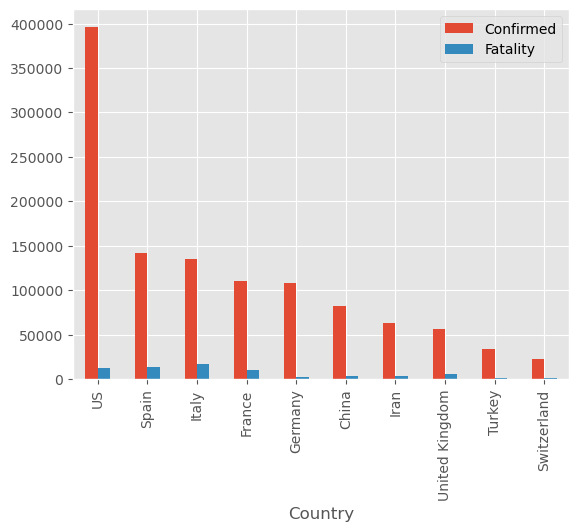

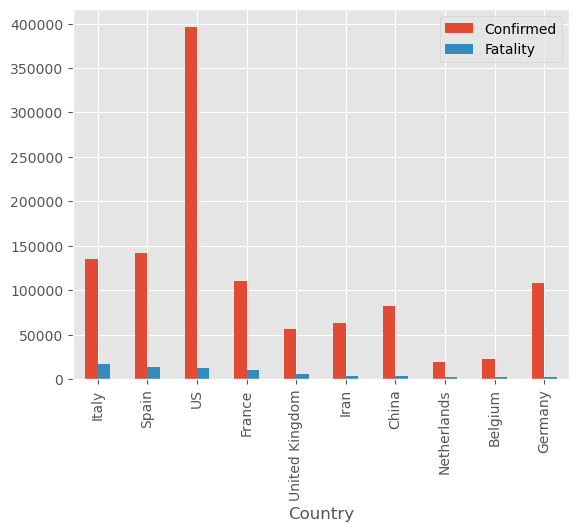

In [30]:
import matplotlib.pyplot as plt
top10_conf.plot.bar()
top10_fat.plot.bar()

AttributeError: 'DataFrame' object has no attribute 'fat'

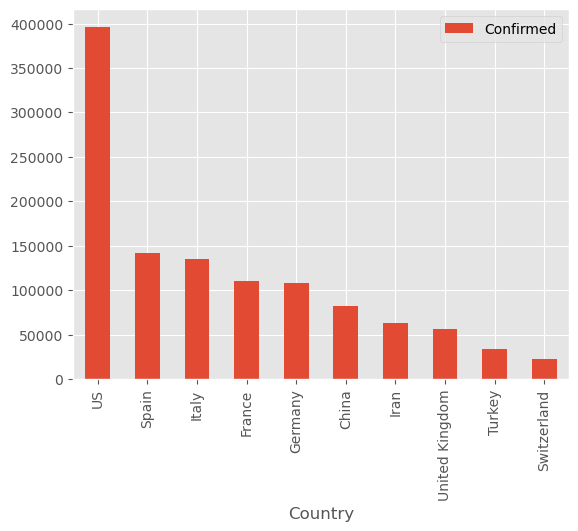

In [36]:
bar_confirmed=top10_conf.drop('Fatality',axis=1)
bar_confirmed.plot.bar()
bar_fatality=top10_conf.fat.drop('Confirmed',axis=1)
bar_fatality.plot.bar()

<AxesSubplot:xlabel='Country'>

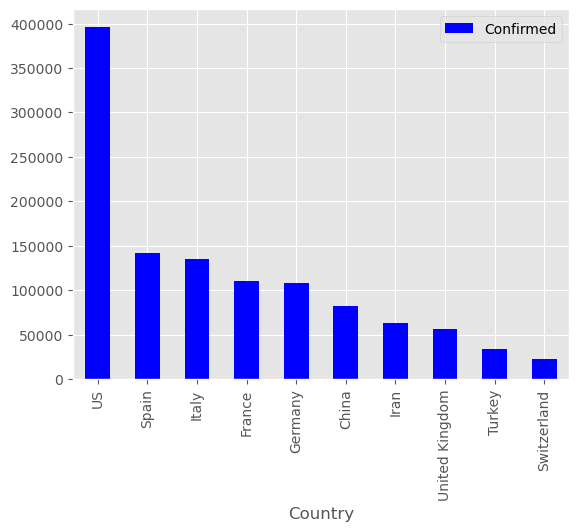

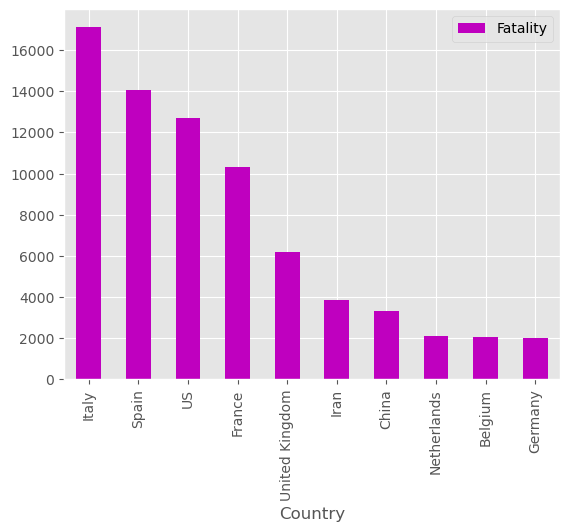

In [37]:
import matplotlib.pyplot as plt
top10_conf
bar_confirmed = top10_conf.drop('Fatality', axis =1)
bar_fatality = top10_fat.drop('Confirmed', axis=1)
bar_confirmed.plot.bar(color = 'b')
bar_fatality.plot.bar(color = 'm')


In [38]:
# Make List of Top 10 Countries and India and Pakistan- The Countries of interest.
list_countries=list(top10_conf.index)
list_countries.append('India')
list_countries.append('Pakistan')


In [44]:
times_series_cntr = train_df.groupby(['Date','Country_Region'])['ConfirmedCases'].sum()\.reset_index().set_index('Date')
df_countries_tm = times_series_cntr[times_series_cntr['Country_Region'].isin(list_countries)]

plt.figure(figsize=(16,12))
ax = sns.lineplot(x=df_countries_tm.index, 
                  y="ConfirmedCases", 
                  hue="Country_Region", 
                  data=df_countries_tm,palette='muted').set_title('Cumulative line')

plt.legend(loc=2, prop={'size': 16})
plt.title('Cumulative trend plot for Confirmed Cases')
plt.xticks(rotation=90);



SyntaxError: unexpected character after line continuation character (2264432571.py, line 1)

In [45]:
Confirm_pivot=pd.pivot_table(train_df,index='Date',columns='Country_Region',
                             values='ConfirmedCases',aggfunc=np.sum)
Confirm_pivot


Country_Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
Date                                                             
2020-01-22              0.0      0.0      0.0      0.0     0.0   
2020-01-23              0.0      0.0      0.0      0.0     0.0   
2020-01-24              0.0      0.0      0.0      0.0     0.0   
2020-01-25              0.0      0.0      0.0      0.0     0.0   
2020-01-26              0.0      0.0      0.0      0.0     0.0   
...                     ...      ...      ...      ...     ...   
2020-04-03            281.0    304.0   1171.0    439.0     8.0   
2020-04-04            299.0    333.0   1251.0    466.0    10.0   
2020-04-05            349.0    361.0   1320.0    501.0    14.0   
2020-04-06            367.0    377.0   1423.0    525.0    16.0   
2020-04-07            423.0    383.0   1468.0    545.0    17.0   

Country_Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
Date                                                                          
2020-01-22                      0.0        0.0      0.0        0.0      0.0   
2020-01-23                      0.0        0.0      0.0        0.0      0.0   
2020-01-24                      0.0        0.0      0.0        0.0      0.0   
2020-01-25                      0.0        0.0      0.0        0.0      0.0   
2020-01-26                      0.0        0.0      0.0        4.0      0.0   
...                             ...        ...      ...        ...      ...   
2020-04-03                     15.0     1265.0    736.0     5330.0  11524.0   
2020-04-04                     15.0     1451.0    770.0     5550.0  11781.0   
2020-04-05                     15.0     1451.0    822.0     5687.0  12051.0   
2020-04-06                     15.0     1554.0    833.0     5797.0  12297.0   
2020-04-07                     19.0     1628.0    853.0     5895.0  12639.0   

Country_Region  ...  Ukraine  United Arab Emirates  United Kingdom  Uruguay  \
Date            ...                                                           
2020-01-22      ...      0.0                   0.0             0.0      0.0   
2020-01-23      ...      0.0                   0.0             0.0      0.0   
2020-01-24      ...      0.0                   0.0             0.0      0.0   
2020-01-25      ...      0.0                   0.0             0.0      0.0   
2020-01-26      ...      0.0                   0.0             0.0      0.0   
...             ...      ...                   ...             ...      ...   
2020-04-03      ...   1072.0                1264.0         38689.0    369.0   
2020-04-04      ...   1225.0                1505.0         42476.0    400.0   
2020-04-05      ...   1308.0                1799.0         48434.0    400.0   
2020-04-06      ...   1319.0                2076.0         52277.0    406.0   
2020-04-07      ...   1462.0                2359.0         55947.0    424.0   

Country_Region  Uzbekistan  Venezuela  Vietnam  West Bank and Gaza  Zambia  \
Date                                                                         
2020-01-22             0.0        0.0      0.0                 0.0     0.0   
2020-01-23             0.0        0.0      2.0                 0.0     0.0   
2020-01-24             0.0        0.0      2.0                 0.0     0.0   
2020-01-25             0.0        0.0      2.0                 0.0     0.0   
2020-01-26             0.0        0.0      2.0                 0.0     0.0   
...                    ...        ...      ...                 ...     ...   
2020-04-03           227.0      153.0    237.0               194.0    39.0   
2020-04-04           266.0      155.0    240.0               217.0    39.0   
2020-04-05           342.0      159.0    241.0               237.0    39.0   
2020-04-06           457.0      165.0    245.0               254.0    39.0   
2020-04-07           520.0      165.0    249.0               261.0    39.0   

Country_Region  Zimbabwe  
Date                      
2020-01-22      

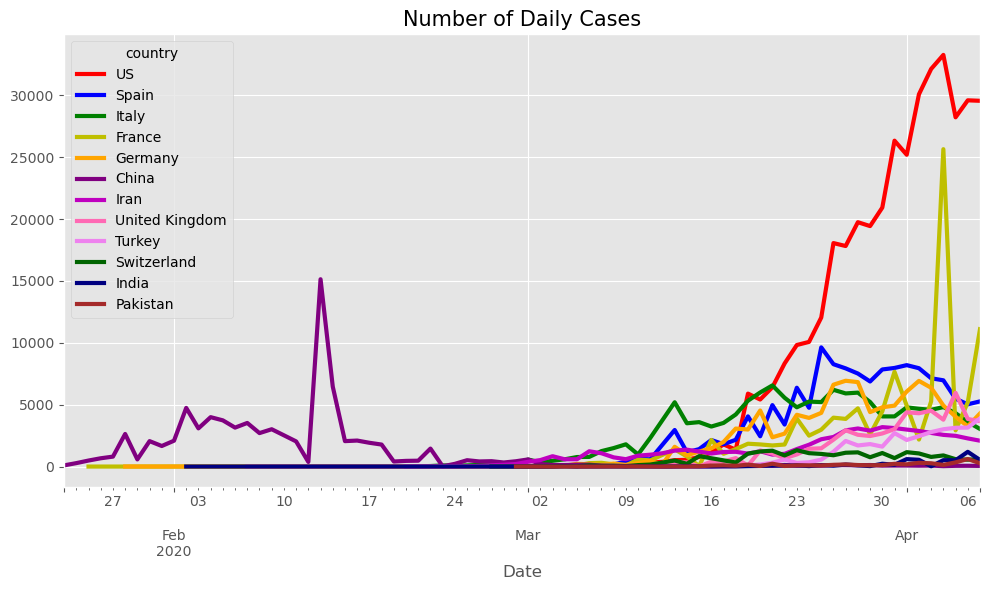

In [46]:
plt.figure(figsize=(10,6))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']
for i,country in enumerate(list_countries):
    Confirm=Confirm_pivot[Confirm_pivot[country]>0][country].diff().fillna(0)
    Confirm=Confirm[Confirm>0]
    Confirm.plot(color=colors[i],label=country,markersize=8,lw=3)   
    plt.title('Number of Daily Cases',fontsize=15)
    plt.legend(title='country')
plt.tight_layout()


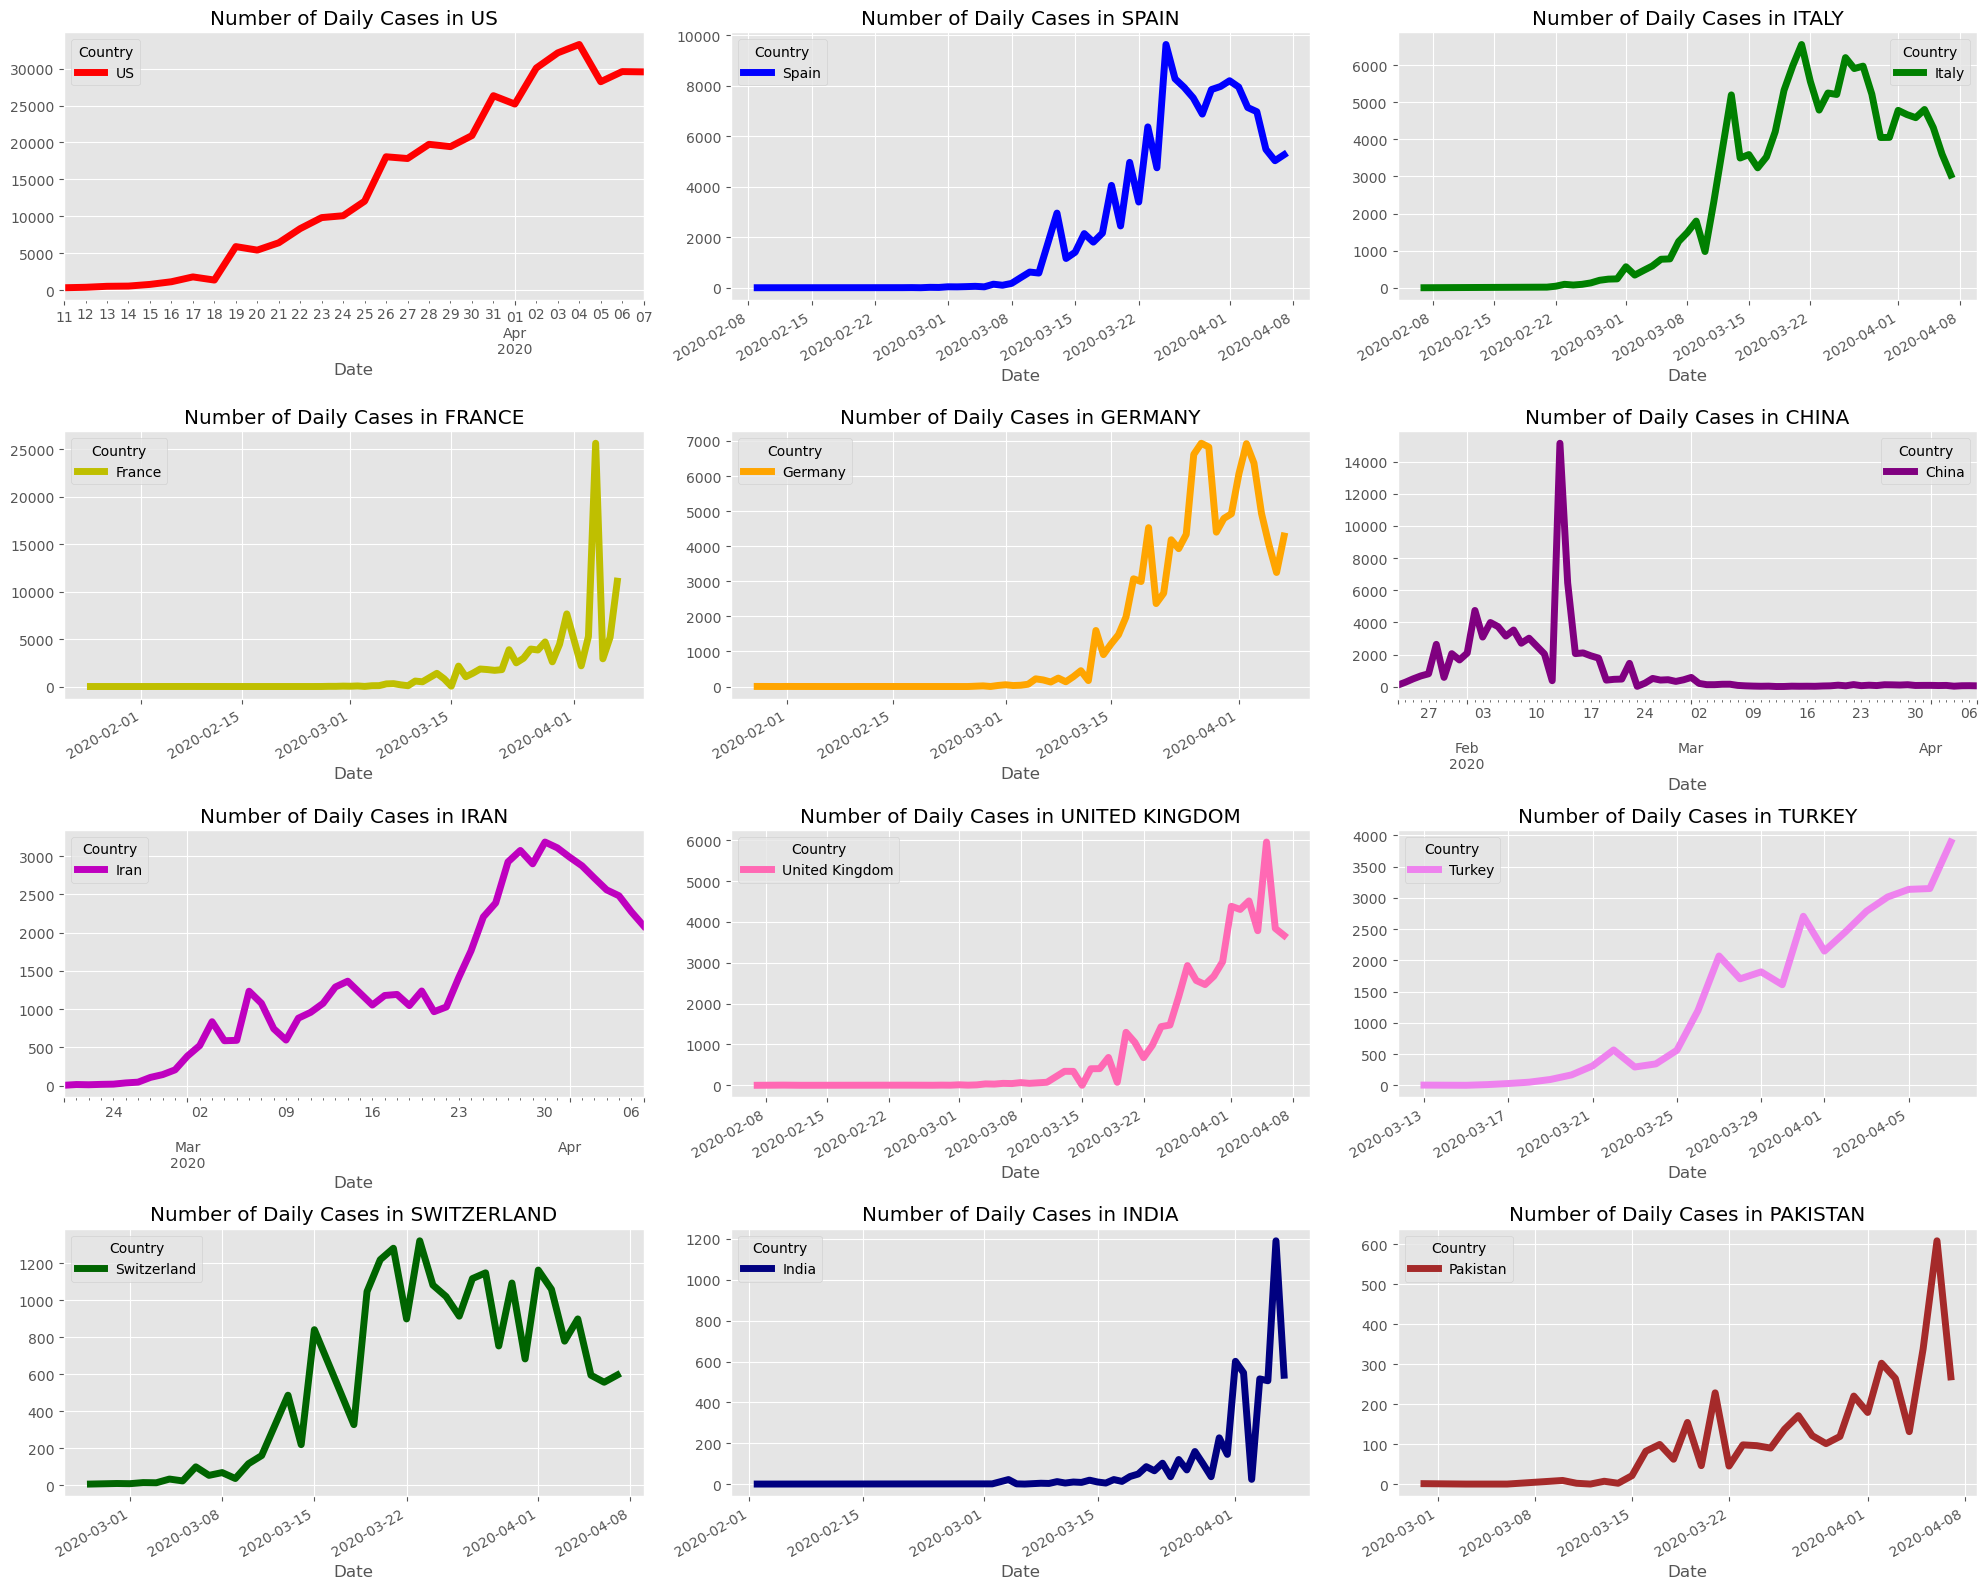

In [51]:
plt.figure(figsize=(20,16))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']
for i,country in enumerate(list_countries):
    Confirm=Confirm_pivot[Confirm_pivot[country]>0][country].diff().fillna(0)
    Confirm=Confirm[Confirm>0]
    
    plt.subplot(4,3,i+1)
    Confirm.plot(color=colors[i],label=country,markersize=12,lw=5)    
    plt.xticks()
    plt.legend(title='Country')
    plt.title('Number of Daily Cases in {}'.format(country.upper()))
plt.tight_layout()


In [52]:
coun = []
maxi= []
id_m= []

for country in list_countries:
    id_max=Confirm_pivot[country].diff().fillna(0).idxmax()
    maxim=Confirm_pivot[country].diff().fillna(0).max()
    print('Maximum New Cases registered for {0} was {1} on {2}'.format(country,maxim,id_max))
    coun.append(country)
    maxi.append(maxim)
    id_m.append(id_max)

df_max_case = pd.DataFrame(list(zip(coun, maxi, id_m)), columns =['country', 'max_case', 'date']) 
df_max_case

df_max_case['date']=df_max_case['date'].astype(str)


Maximum New Cases registered for US was 33264.0 on 2020-04-04 00:00:00
Maximum New Cases registered for Spain was 9630.0 on 2020-03-25 00:00:00
Maximum New Cases registered for Italy was 6557.0 on 2020-03-21 00:00:00
Maximum New Cases registered for France was 25646.0 on 2020-04-04 00:00:00
Maximum New Cases registered for Germany was 6933.0 on 2020-03-27 00:00:00
Maximum New Cases registered for China was 15136.0 on 2020-02-13 00:00:00
Maximum New Cases registered for Iran was 3186.0 on 2020-03-30 00:00:00
Maximum New Cases registered for United Kingdom was 5958.0 on 2020-04-05 00:00:00
Maximum New Cases registered for Turkey was 3892.0 on 2020-04-07 00:00:00
Maximum New Cases registered for Switzerland was 1321.0 on 2020-03-23 00:00:00
Maximum New Cases registered for India was 1190.0 on 2020-04-06 00:00:00
Maximum New Cases registered for Pakistan was 609.0 on 2020-04-06 00:00:00


In [53]:
fig = px.bar(df_max_case, x=df_max_case.country, y='max_case', text = 'date',
             labels={'x':'country'}, color="country", 
             color_continuous_scale=px.colors.sequential.Rainbow_r)
fig.update_layout(title_text='Date on which a top 12 countries had Maximum cases')
fig.show()


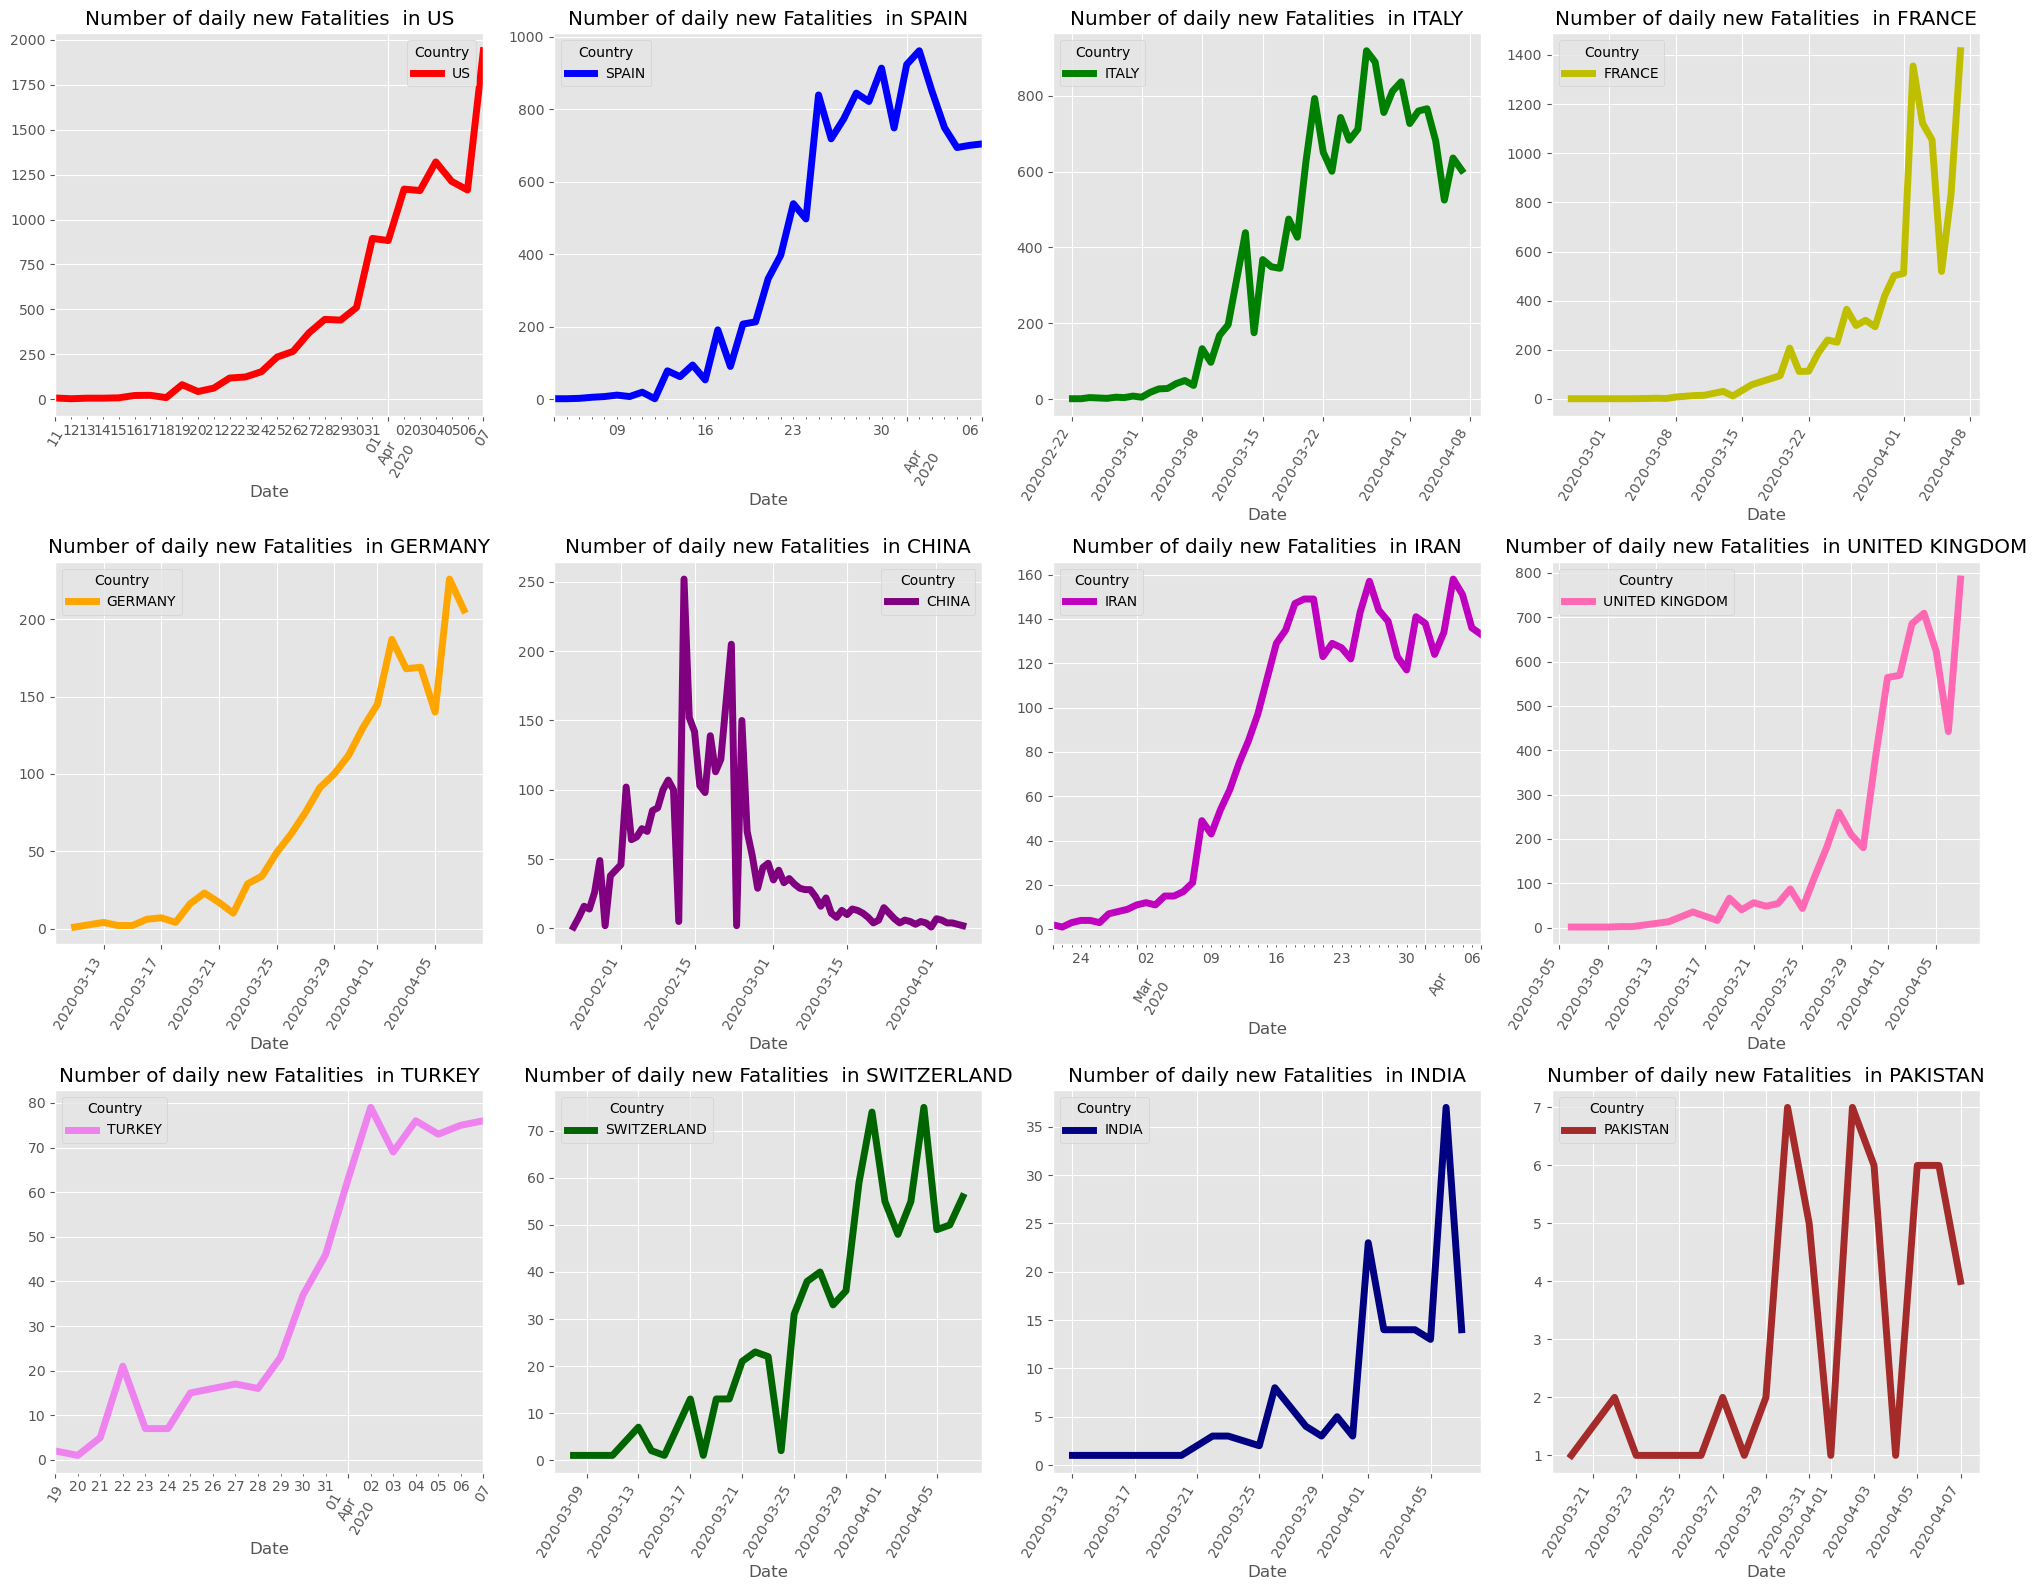

In [55]:
plt.figure(figsize=(20,16))
for i,country in enumerate(list_countries):
    Fatal_diff=Fatal_pivot[(Fatal_pivot[country]>0)][country].diff().fillna(0)
    Fatal_diff=Fatal_diff[Fatal_diff>0]
    plt.subplot(3,4,i+1)
    Fatal_diff.plot(color=colors[i],label=country.upper(),lw=5)
    plt.xticks(rotation=60)
    plt.title('Number of daily new Fatalities  in {}'.format(country.upper()))
    plt.legend(title='Country')
plt.tight_layout()


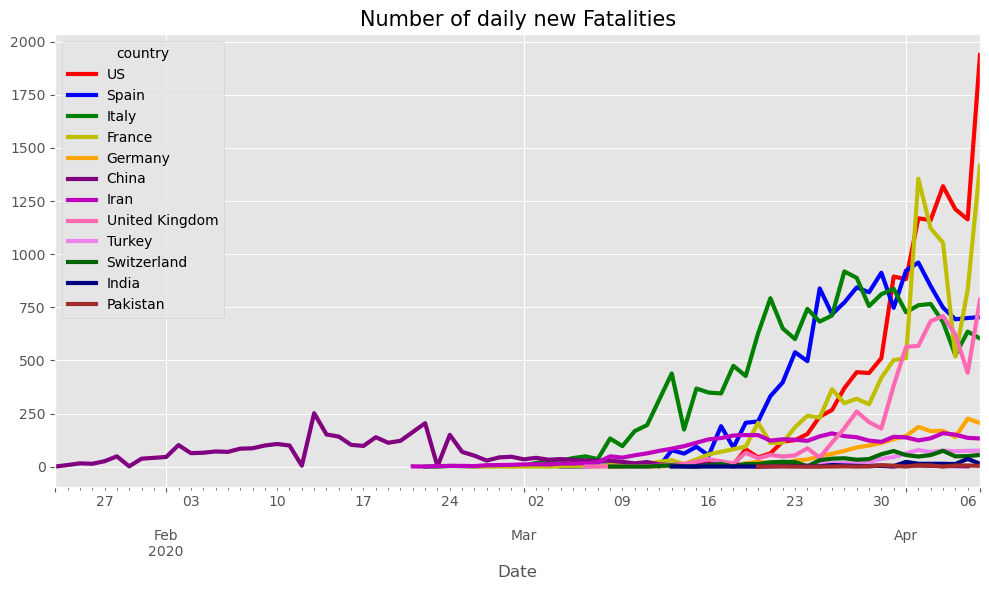

In [57]:
Fatal_pivot=pd.pivot_table(train_df,index='Date',
                           columns='Country_Region',
                           values='Fatalities',
                           aggfunc=np.sum)

plt.figure(figsize=(10,6))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']
for i,country in enumerate(list_countries):
    Fatal_diff=Fatal_pivot[Fatal_pivot[country]>0][country].diff().fillna(0)
    Fatal_diff=Fatal_diff[Fatal_diff>0]
    Fatal_diff.plot(color=colors[i],label=country,markersize=8,lw=3)   
    plt.title('Number of daily new Fatalities',fontsize=15)
    plt.legend(title='country')
plt.tight_layout()


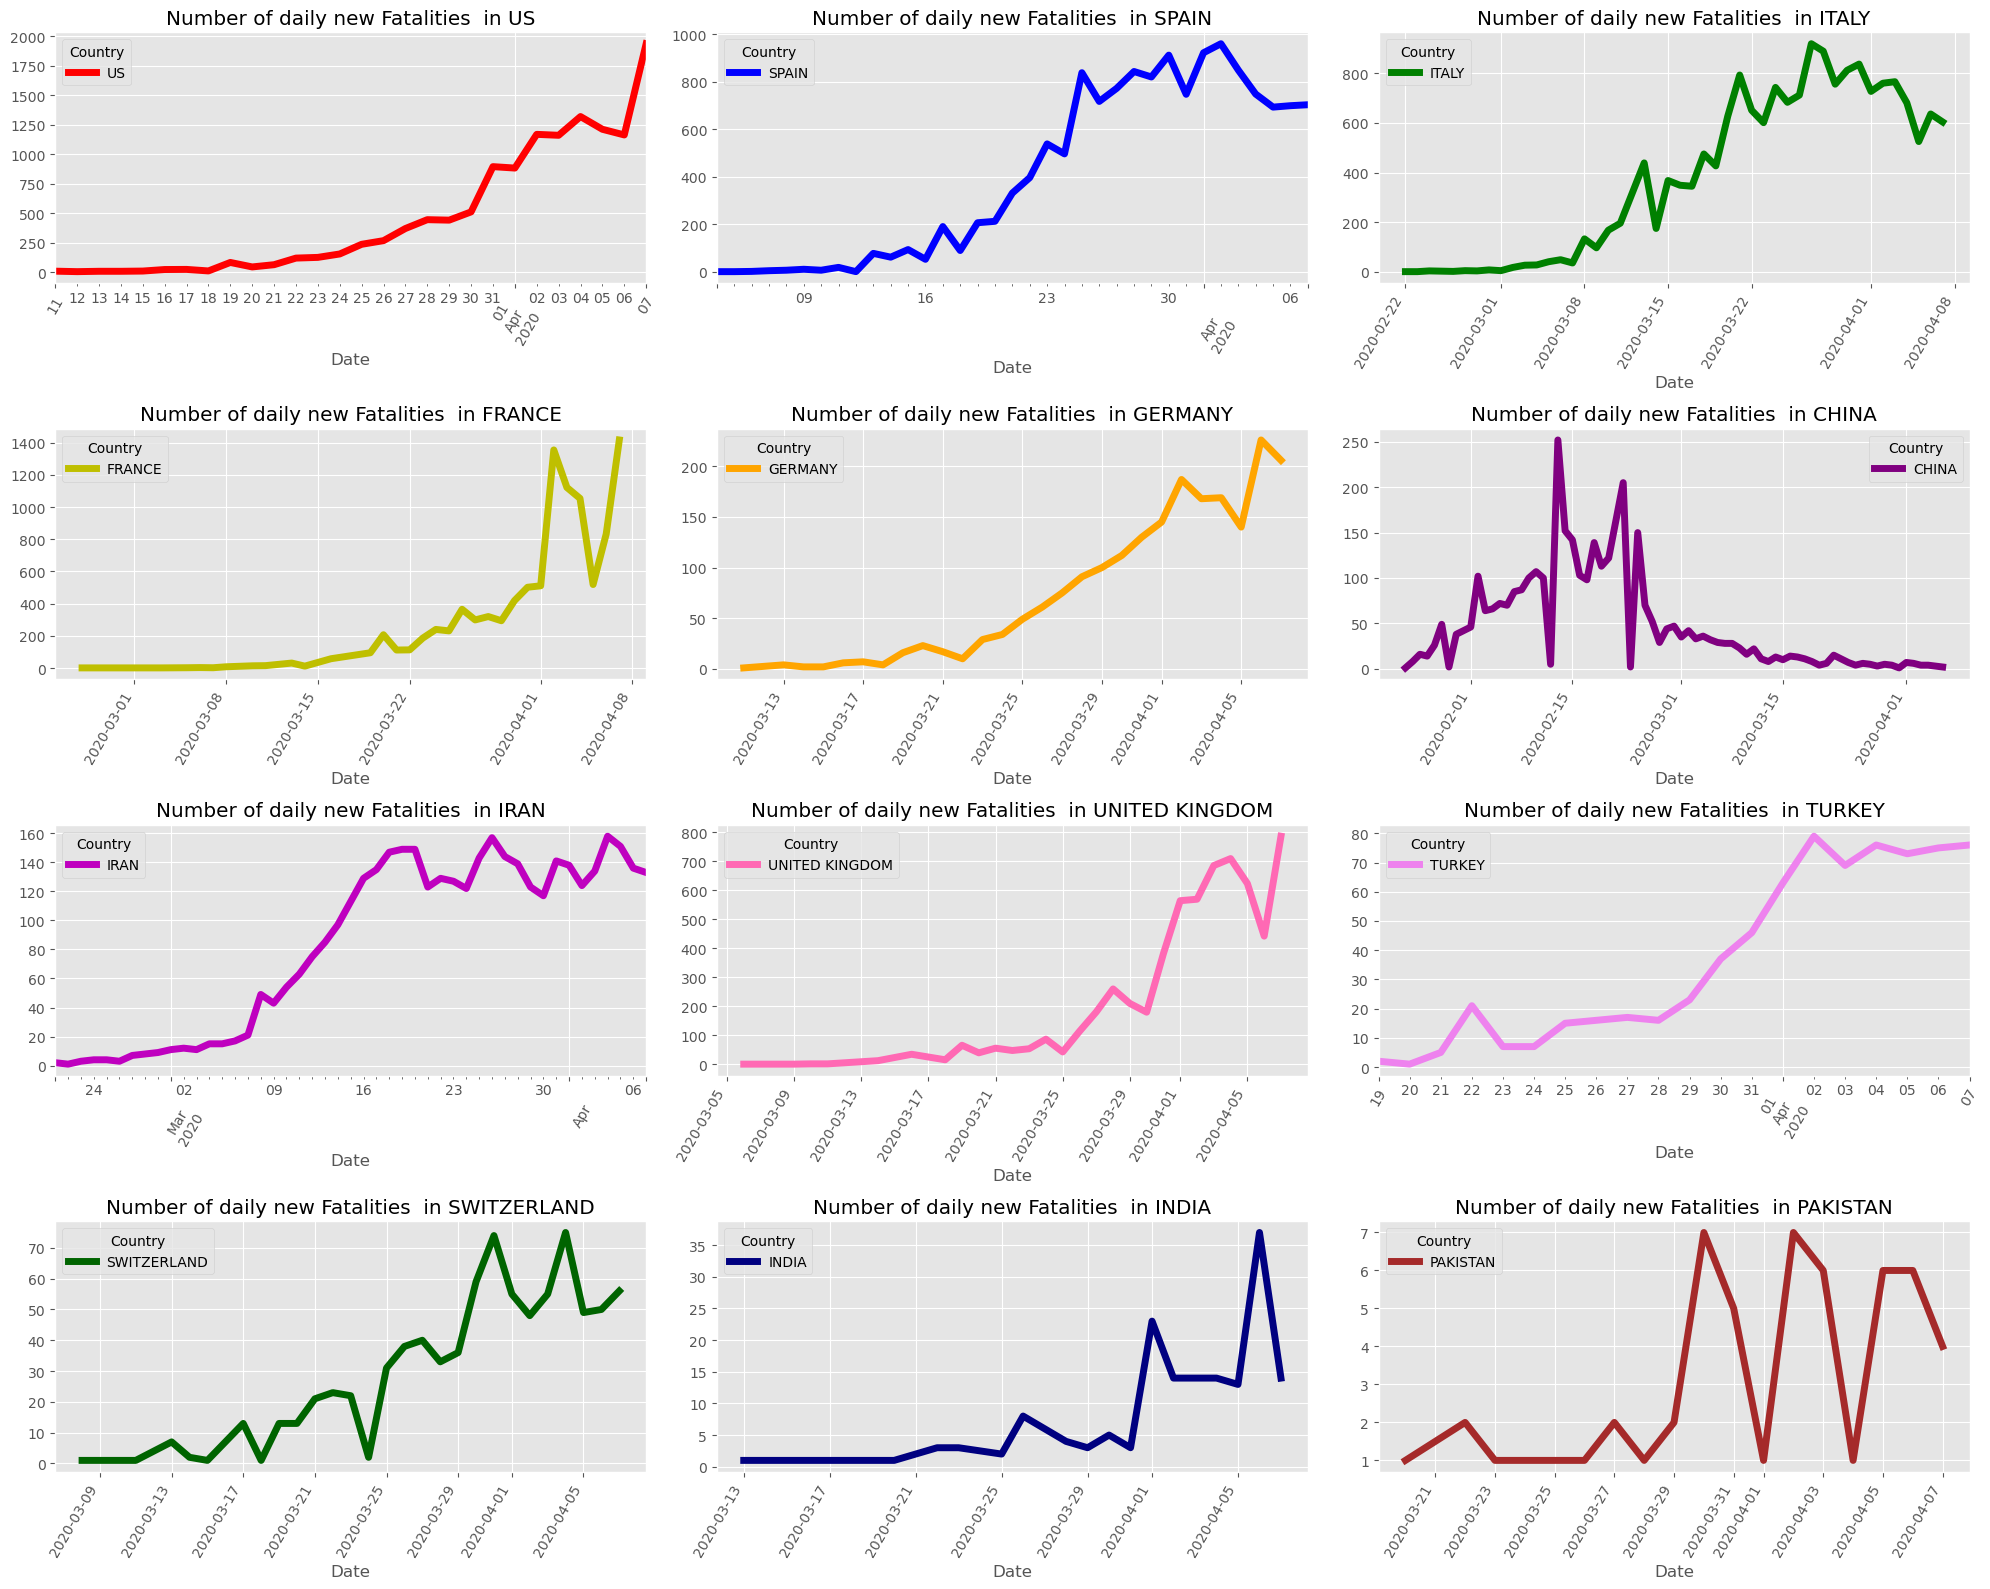

In [59]:
plt.figure(figsize=(20,16))
for i,country in enumerate(list_countries):
    Fatal_diff=Fatal_pivot[(Fatal_pivot[country]>0)][country].diff().fillna(0)
    Fatal_diff=Fatal_diff[Fatal_diff>0]
    plt.subplot(4,3,i+1)
    Fatal_diff.plot(color=colors[i],label=country.upper(),lw=5)
    plt.xticks(rotation=60)
    plt.title('Number of daily new Fatalities  in {}'.format(country.upper()))
    plt.legend(title='Country')
plt.tight_layout()


In [60]:
coun = []
maxi= []
id_m= []

for country in list_countries:
    id_max=Fatal_pivot[country].diff().fillna(0).idxmax()
    maxim=Fatal_pivot[country].diff().fillna(0).max()
    print('Maximum Fatalities for {0} was {1} on {2}'.format(country,maxim,id_max))
    coun.append(country)
    maxi.append(maxim)
    id_m.append(id_max)

df_max_fat = pd.DataFrame(list(zip(coun, maxi, id_m)), columns =['country', 'max_fat', 'date']) 
df_max_fat

df_max_fat['date']=df_max_fat['date'].astype(str)


Maximum Fatalities for US was 1938.0 on 2020-04-07 00:00:00
Maximum Fatalities for Spain was 961.0 on 2020-04-02 00:00:00
Maximum Fatalities for Italy was 919.0 on 2020-03-27 00:00:00
Maximum Fatalities for France was 1417.0 on 2020-04-07 00:00:00
Maximum Fatalities for Germany was 226.0 on 2020-04-06 00:00:00
Maximum Fatalities for China was 252.0 on 2020-02-13 00:00:00
Maximum Fatalities for Iran was 158.0 on 2020-04-04 00:00:00
Maximum Fatalities for United Kingdom was 786.0 on 2020-04-07 00:00:00
Maximum Fatalities for Turkey was 79.0 on 2020-04-02 00:00:00
Maximum Fatalities for Switzerland was 75.0 on 2020-04-04 00:00:00
Maximum Fatalities for India was 37.0 on 2020-04-06 00:00:00
Maximum Fatalities for Pakistan was 7.0 on 2020-03-30 00:00:00


Text(0.5, 0.98, 'Variation in number of confirmed cases on daily basis')

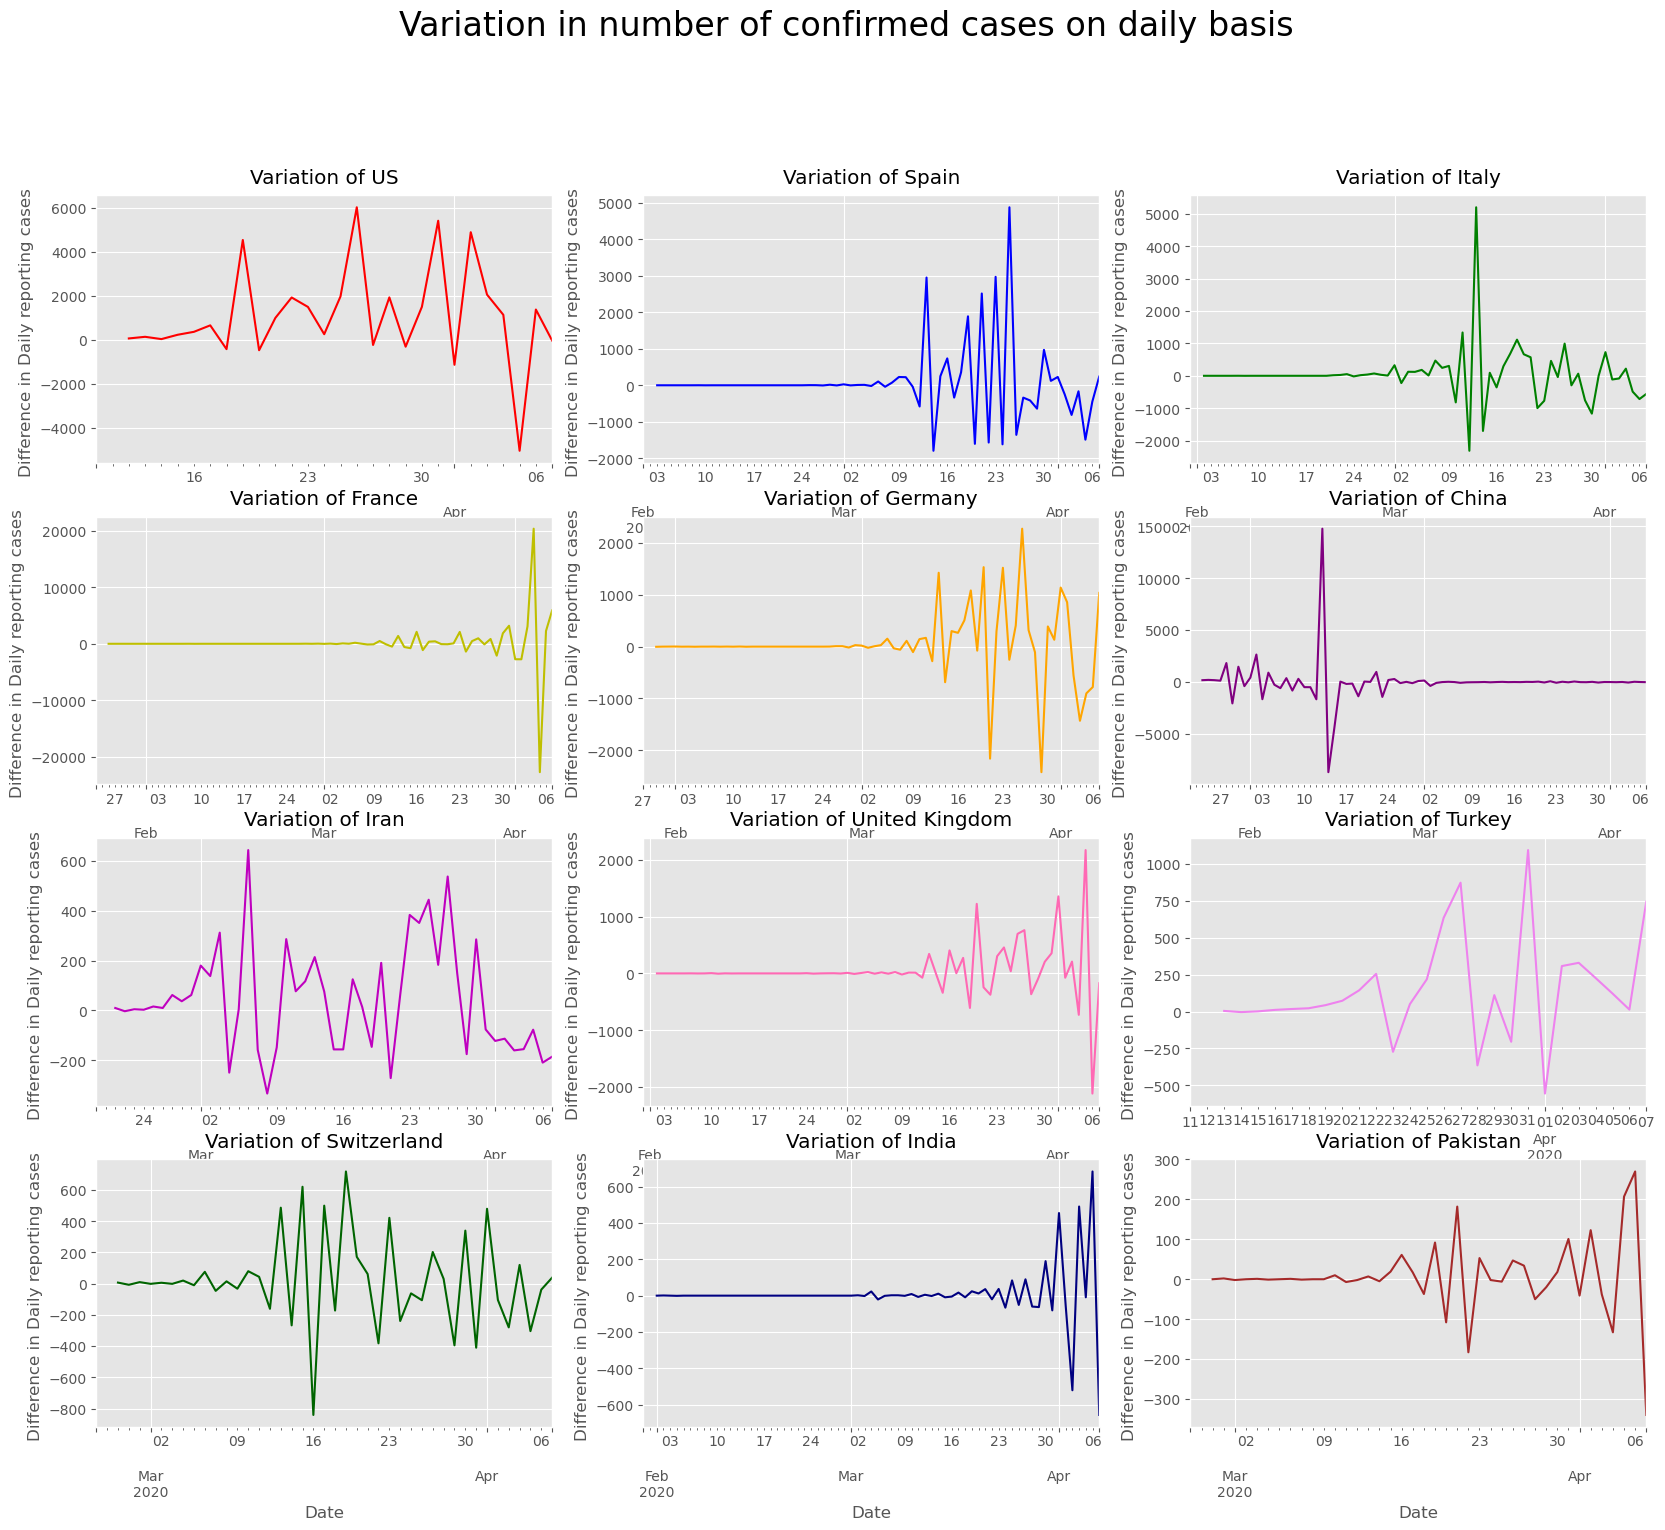

In [61]:
# Understanding New cases confirmation variations on daily basis
plt.figure(figsize=(20,16))
for i,country in enumerate(list_countries):
    plt.subplot(4,3,i+1)
    train_df[(train_df['Country_Region']==country)&(train_df['ConfirmedCases']!=0)].groupby('Date')['ConfirmedCases'].sum().diff().diff().plot(color=colors[i])
    plt.ylabel('Difference in Daily reporting cases ')
    plt.title('Variation of {}'.format(country),va='bottom')
plt.suptitle('Variation in number of confirmed cases on daily basis',fontsize=24,va='baseline')


In [62]:
#varaition we get

Part 3: Exploratory Data Analysis
Q3.1. Confirmed Cases trend (pattern) from first day of incidence (confirmed cases)

Q3.2. Fatalities trend from first day of incidence

Q3.3. Comparision of Confirmed Cases and Fatalities worldwide trend on normal and log scale

Q3.4. Corelation between ConfirmedCases and Fatalities worldwide

Q3.5. Confirmed Cases worldwide trend (without China)

Q3.5. Fatalities Cases worldwide trend (without China)


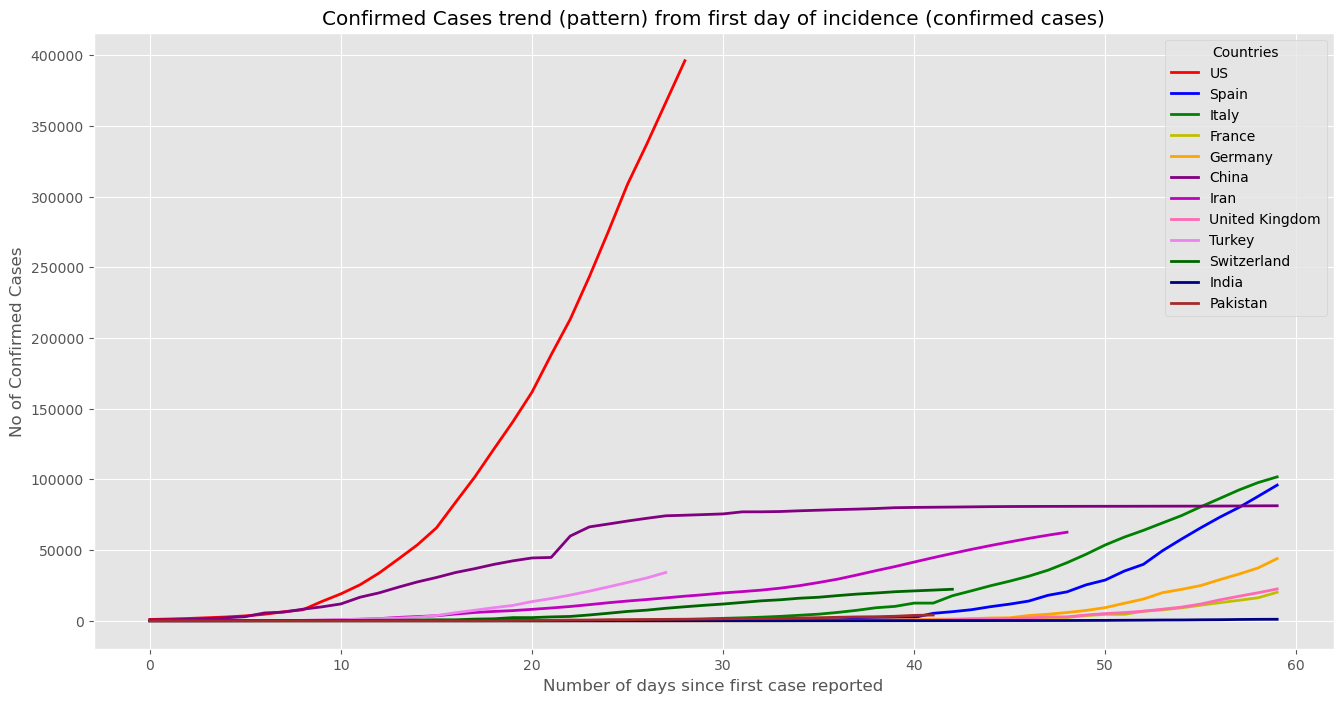

In [63]:
plt.figure(figsize=(16,8))
plt.title('Confirmed Cases trend (pattern) from first day of incidence (confirmed cases)')
for i,country in enumerate(list_countries):
    confirm_group=train_df[(train_df['Country_Region']==country)&train_df['ConfirmedCases']!=0].groupby('Date').agg({'ConfirmedCases':['sum']})
    confirm_value=[j for j in confirm_group.ConfirmedCases['sum'].values]
    plot_value=confirm_value[0:60]
    plt.plot(plot_value,color=colors[i],label=country,lw=2)
    plt.legend(title='Countries')
    plt.xlabel("Number of days since first case reported")
    plt.ylabel("No of Confirmed Cases")


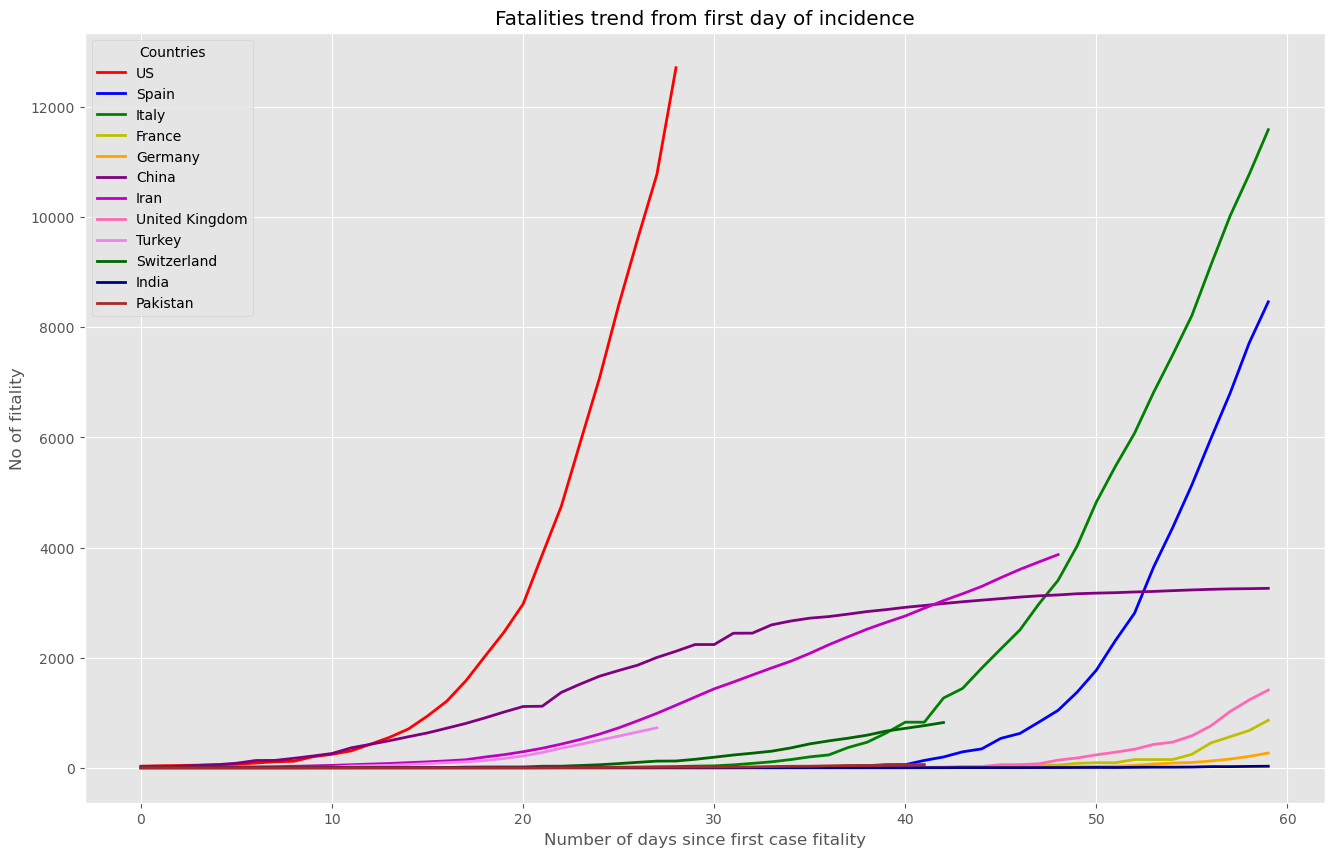

In [64]:
plt.figure(figsize=(16,10))
plt.title('Fatalities trend from first day of incidence')
for i,country in enumerate(list_countries):
    fatal_group=train_df[(train_df['Country_Region']==country)&train_df['ConfirmedCases']!=0].groupby('Date').agg({'Fatalities':['sum']})
    fatal_value=[j for j in fatal_group.Fatalities['sum'].values]
    plot_value=fatal_value[0:60]
    plt.plot(plot_value,color=colors[i],label=country,lw=2)
    plt.legend(title='Countries')
    plt.xlabel("Number of days since first case fitality")
    plt.ylabel("No of fitality")


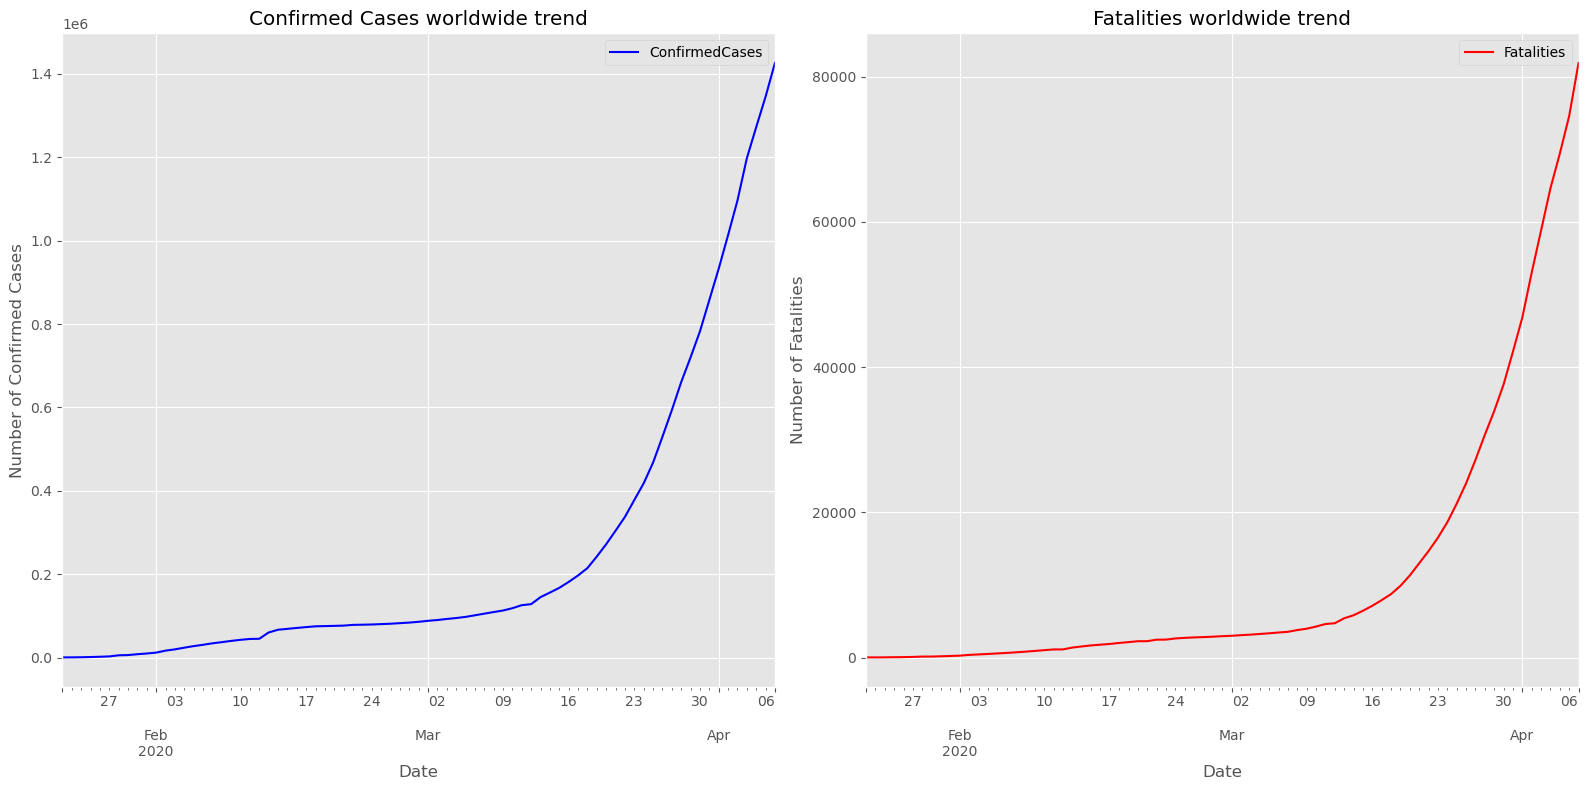

In [65]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
train_df.groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.title('Confirmed Cases worldwide trend')

plt.subplot(1,2,2)
train_df.groupby('Date')['Fatalities'].sum().plot(color='r')
plt.ylabel('Number of Fatalities')
plt.title("Fatalities worldwide trend")
plt.legend()
plt.tight_layout()


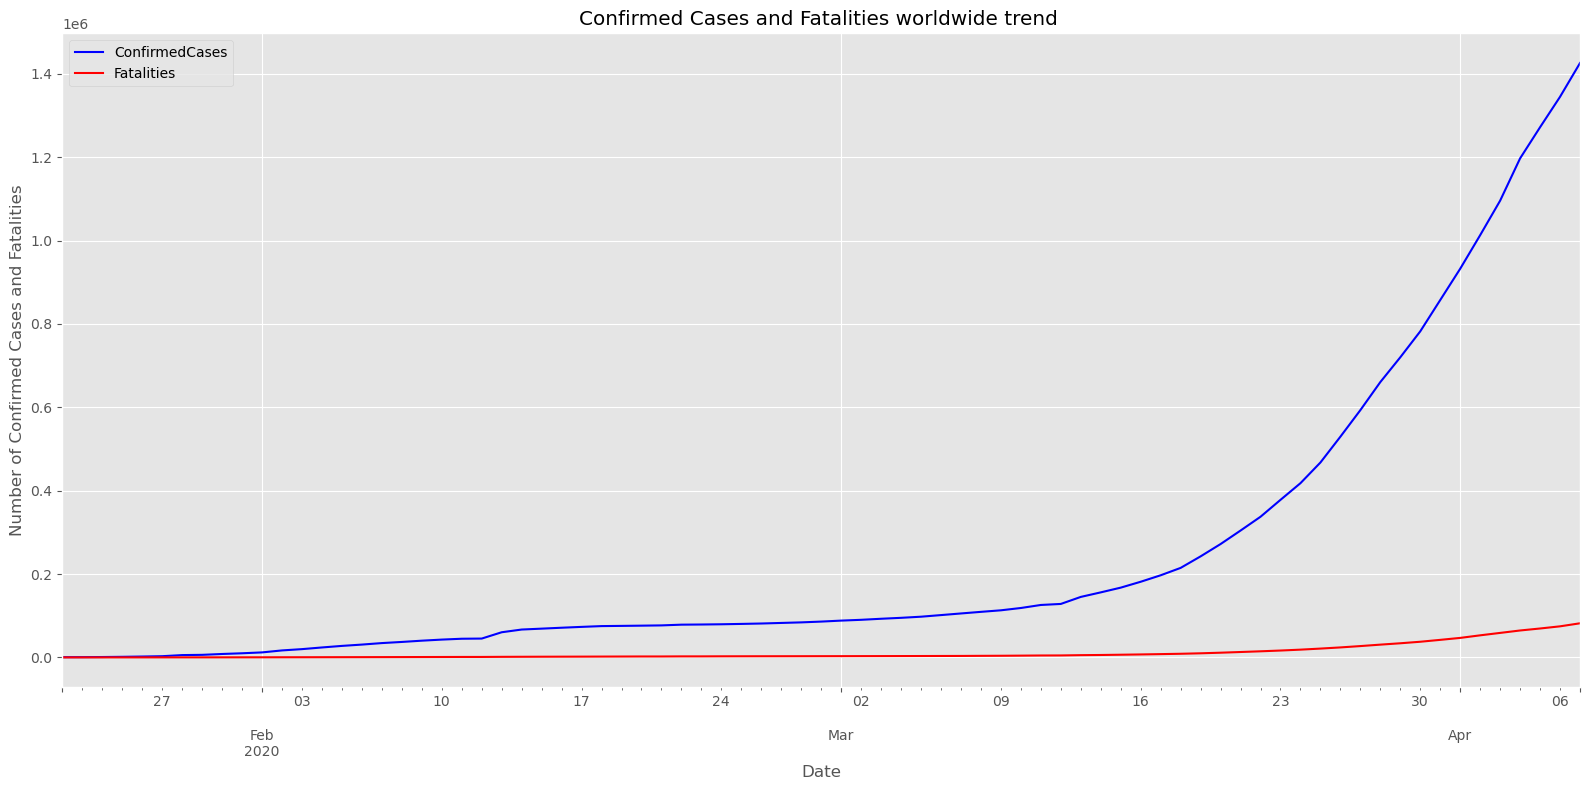

In [66]:
plt.figure(figsize=(16,8))
train_df.groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
train_df.groupby('Date')['Fatalities'].sum().plot(color='r')
plt.ylabel('Number of Confirmed Cases and Fatalities')
plt.title('Confirmed Cases and Fatalities worldwide trend ')
plt.legend()
plt.tight_layout()


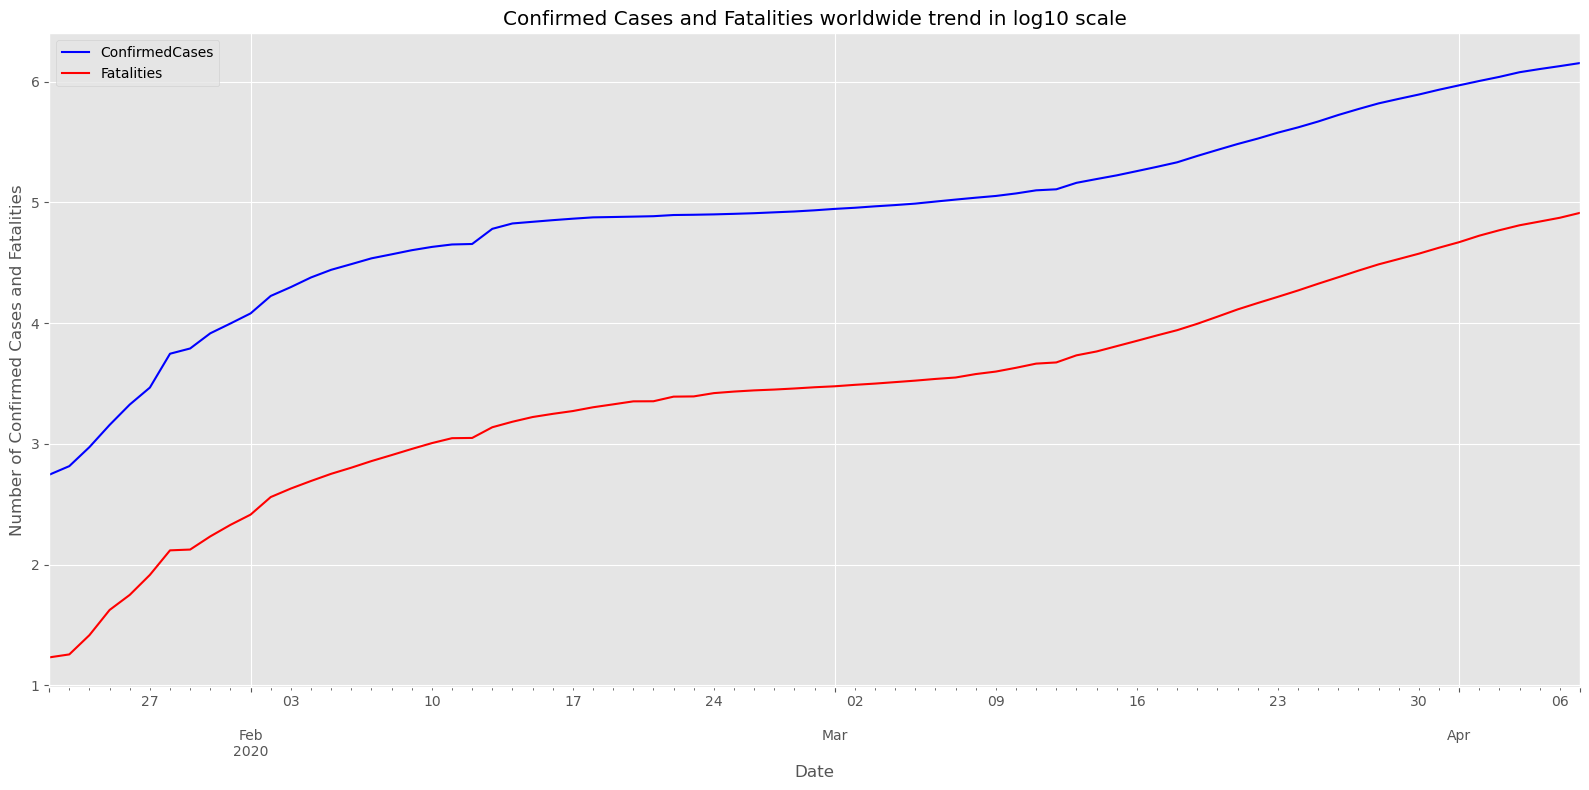

In [67]:
plt.figure(figsize=(16,8))
np.log10(train_df.groupby('Date')['ConfirmedCases'].sum()).plot(color='blue')
np.log10(train_df.groupby('Date')['Fatalities'].sum()).plot(color='r')
plt.ylabel('Number of Confirmed Cases and Fatalities')
plt.title('Confirmed Cases and Fatalities worldwide trend in log10 scale')
plt.legend()
plt.tight_layout()


In [68]:
cc=train_df.groupby('Date')['ConfirmedCases'].sum()
ft=train_df.groupby('Date')['Fatalities'].sum()

fig = go.Figure(data=go.Scatter(x=cc, y=ft, mode='lines+markers'))
# Edit the layout
fig.update_layout(title='Corelation between ConfirmedCases and Fatalities worldwide',
                   xaxis_title='Confirmed Cases ',
                   yaxis_title='Fatalities')
fig.show()

correlation_matrix = np.corrcoef(cc, ft)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)


0.993251915462666


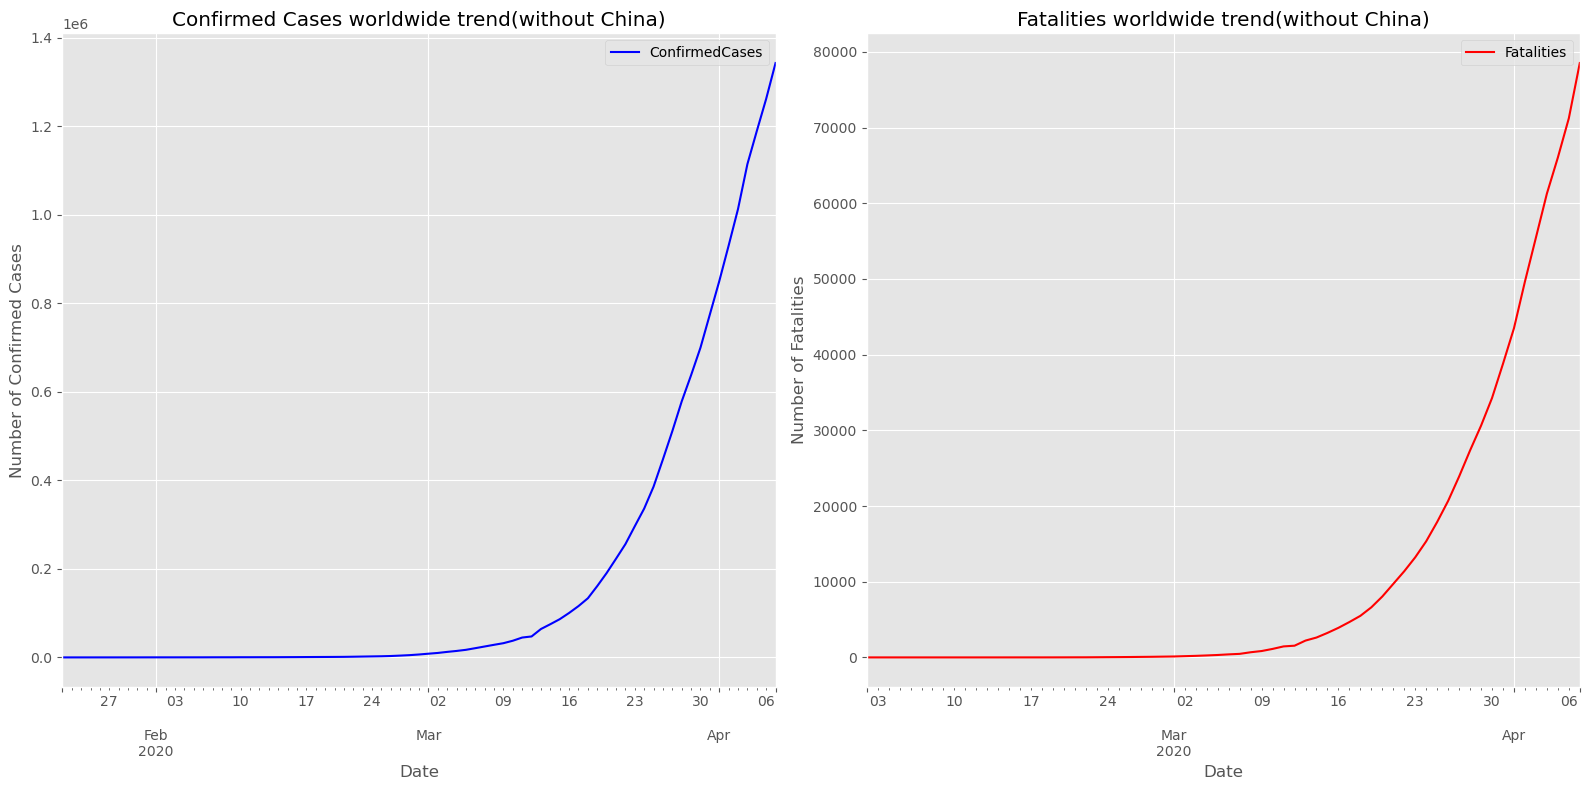

In [69]:
# Confirmed Cases and Fatalities without China's data
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
train_df[(train_df['Country_Region']!='China')&(train_df['ConfirmedCases']!=0)].groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.title('Confirmed Cases worldwide trend(without China)')

plt.subplot(1,2,2)
train_df[(train_df['Country_Region']!='China')&(train_df['Fatalities']!=0)].groupby('Date')['Fatalities'].sum().plot(color='red')
plt.ylabel('Number of Fatalities')
plt.title("Fatalities worldwide trend(without China)")
plt.legend()
plt.tight_layout()


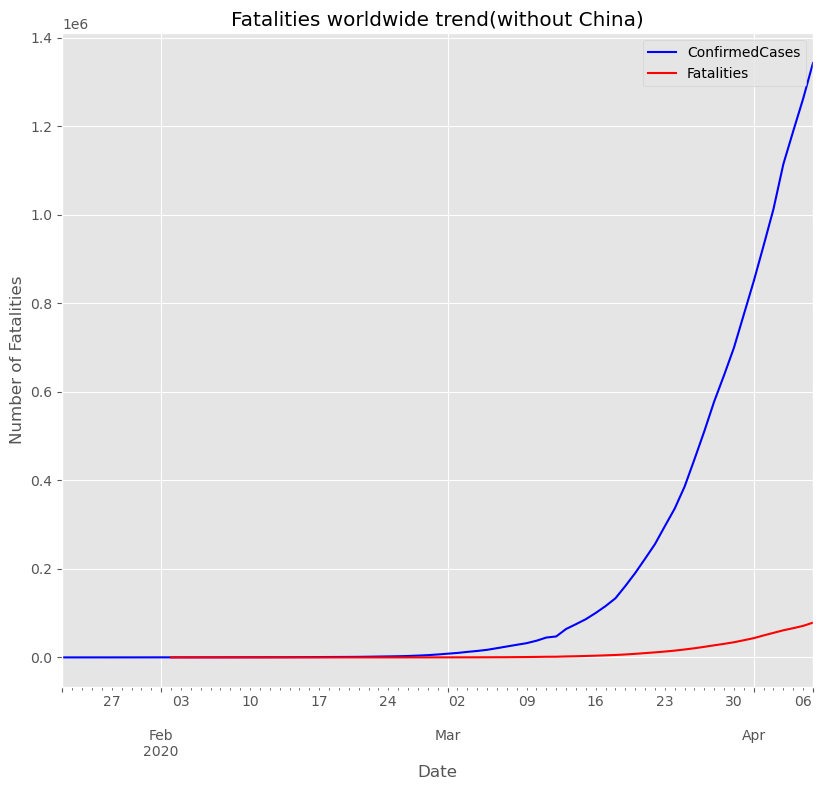

In [70]:
# Confirmed Cases and Fatalities without China's data
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
train_df[(train_df['Country_Region']!='China')&(train_df['ConfirmedCases']!=0)].groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
train_df[(train_df['Country_Region']!='China')&(train_df['Fatalities']!=0)].groupby('Date')['Fatalities'].sum().plot(color='red')
plt.ylabel('Number of Fatalities')
plt.title("Fatalities worldwide trend(without China)")
plt.legend()
plt.tight_layout()


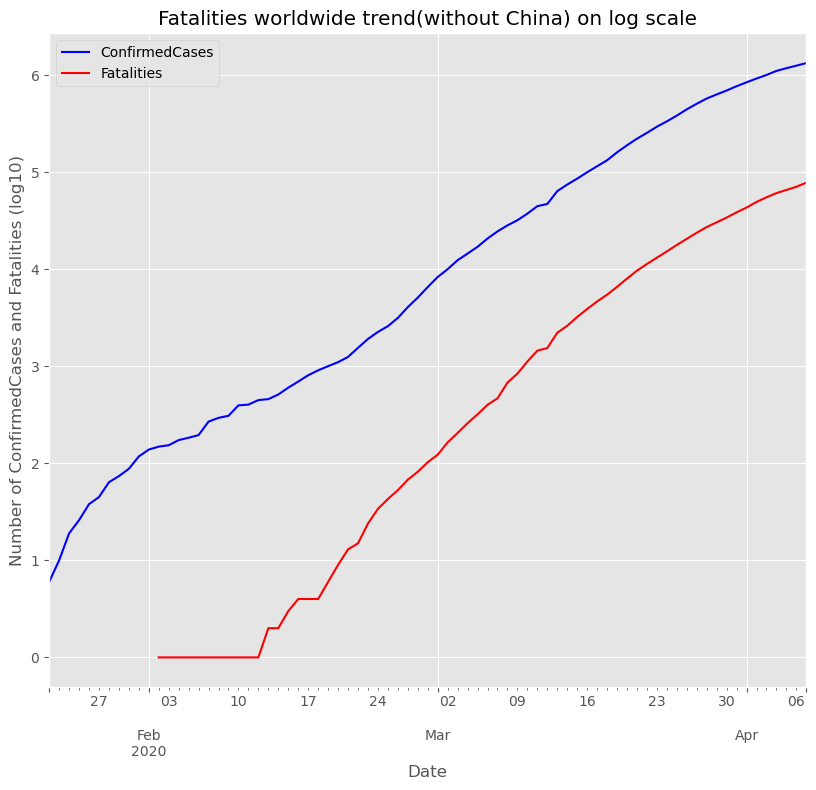

In [71]:
# Confirmed Cases and Fatalities without China's data on Log scale
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
np.log10(train_df[(train_df['Country_Region']!='China')&(train_df['ConfirmedCases']!=0)].groupby('Date')['ConfirmedCases'].sum()).plot(color='blue')
np.log10(train_df[(train_df['Country_Region']!='China')&(train_df['Fatalities']!=0)].groupby('Date')['Fatalities'].sum()).plot(color='red')
plt.ylabel('Number of ConfirmedCases and Fatalities (log10)')
plt.title("Fatalities worldwide trend(without China) on log scale")
plt.legend()
plt.tight_layout()


In [72]:
'''
Conclusion of Exploratory Data Analysis:

China
According to the news and media Covid-19 has been started from China and the first case was reported in December 2019. The data published on Kaggle has a start date of data collection from 22nd Jan 2020 onwards and by that time in China the confirmed cases were 533.

Italy
Italy has confirmed first case in the end of Jan 2020 (i.e. a month later to China). Italy surpasses China in confirmed cases around 3-4 week of March 2020 and currently third largest in number of registered cases.
'''

'\nConclusion of Exploratory Data Analysis:\n\nChina\nAccording to the news and media Covid-19 has been started from China and the first case was reported in December 2019. The data published on Kaggle has a start date of data collection from 22nd Jan 2020 onwards and by that time in China the confirmed cases were 533.\n\nItaly\nItaly has confirmed first case in the end of Jan 2020 (i.e. a month later to China). Italy surpasses China in confirmed cases around 3-4 week of March 2020 and currently third largest in number of registered cases.\n'

In [73]:
#Q1. Which countries has high number of cases? A1. US followed by Spain and Italy


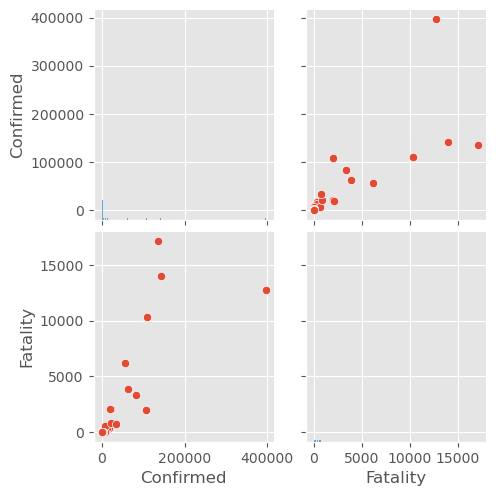

In [23]:
sns.pairplot(data=df)

In [ ]:
'''
import sklearn

from sklearn.model_selection import train_test_split

import statsmodels

import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
df1.describe()
df_vif=df1[['Confirmed','Deaths',	'Recovered',	'Active']]
df_vif.head()
df_vif.shape
#SLR
import sklearn

from sklearn.model_selection import train_test_split

import statsmodels

import statsmodels.api as sm
x_train, x_test, y_train, y_test = train_test_split(df1['Confirmed'], df1.Deaths, test_size = 0.2)
x_train=sm.add_constant(x_train)
x_train
mod1=sm.OLS(y_train,x_train).fit()
print(mod1.summary())
'''
'''
Ho:deth does not depend on Confirmed cases.
p-val<0.05 so HO is rejected 
so Death depends on Confirmed cases
'''

df.reset_index(drop=True, inplace=True)

x_train=sm.add_constant(x_train)

x_train,x_test,y_train,y_test=train_test_split(df1.drop(['WHO_Region','Deaths','Country_Region'],axis=1),df1.Deaths,test_size=0.2)


In [ ]:
import sklearn

from sklearn.model_selection import train_test_split

import statsmodels

import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df1.describe()

In [ ]:
df_vif=df1[['Confirmed','Deaths',	'Recovered',	'Active']]

In [ ]:
df_vif.head()

In [ ]:
df_vif.shape